In [15]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# Import the necesary libraries 
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18.0, 8.0)

In [16]:
census_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Training_set_census.csv" )
#census_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Testing_set_census.csv')

In [17]:
census_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Testing_set_census.csv')

In [18]:
# Data Cleaning

# Training Set
census_data['marital_status'] = census_data['marital_status'].str.lstrip()
census_data['education'] = census_data['education'].str.lstrip()
census_data['major_industry_code'] = census_data['major_industry_code'].str.lstrip()
census_data['major_occupation_code'] = census_data['major_occupation_code'].str.lstrip()
census_data['race'] = census_data['race'].str.lstrip()
census_data['hispanic_origin'] = census_data['hispanic_origin'].str.lstrip()
census_data['sex'] = census_data['sex'].str.lstrip()
census_data['full_parttime_employment_stat'] = census_data['full_parttime_employment_stat'].str.lstrip()
census_data['country_self'] = census_data['country_self'].str.lstrip()

# Eval Set
census_eval['marital_status'] = census_eval['marital_status'].str.lstrip()
census_eval['education'] = census_eval['education'].str.lstrip()
census_eval['major_industry_code'] = census_eval['major_industry_code'].str.lstrip()
census_eval['major_occupation_code'] = census_eval['major_occupation_code'].str.lstrip()
census_eval['race'] = census_eval['race'].str.lstrip()
census_eval['hispanic_origin'] = census_eval['hispanic_origin'].str.lstrip()
census_eval['sex'] = census_eval['sex'].str.lstrip()
census_eval['full_parttime_employment_stat'] = census_eval['full_parttime_employment_stat'].str.lstrip()
census_eval['country_self'] = census_eval['country_self'].str.lstrip()


In [19]:
# Set the right features
train_columns = ['age', 'education', 'wage_per_hour', 
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses',  'country_self',
       'weeks_worked_in_year']

# Set the Training Sets
X_train_raw = census_data[train_columns]
y_train_raw = census_data['income_level']

X_eval_raw = census_eval[train_columns]


In [20]:

# Data preparation
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['education'],prefix='education',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['marital_status'],prefix='marital_status',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['major_industry_code'],prefix='major_industry_code',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['major_occupation_code'],prefix='major_occupation_code',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['race'],prefix='race',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['hispanic_origin'],prefix='hispanic_origin',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['sex'],prefix='sex',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['full_parttime_employment_stat'],prefix='full_parttime_employment_stat',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['country_self'],prefix='country_self',prefix_sep='_')], axis=1)

# Data preparation Eval
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['education'],prefix='education',prefix_sep='_')], axis=1)
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['marital_status'],prefix='marital_status',prefix_sep='_')], axis=1)
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['major_industry_code'],prefix='major_industry_code',prefix_sep='_')], axis=1)
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['major_occupation_code'],prefix='major_occupation_code',prefix_sep='_')], axis=1)
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['race'],prefix='race',prefix_sep='_')], axis=1)
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['hispanic_origin'],prefix='hispanic_origin',prefix_sep='_')], axis=1)
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['sex'],prefix='sex',prefix_sep='_')], axis=1)
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['full_parttime_employment_stat'],prefix='full_parttime_employment_stat',prefix_sep='_')], axis=1)
X_eval_raw = pd.concat([X_eval_raw, pd.get_dummies(X_eval_raw['country_self'],prefix='country_self',prefix_sep='_')], axis=1)

X_train_raw.drop(['education','marital_status', 'major_industry_code', 'major_occupation_code',
                'race', 'hispanic_origin', 'sex', 'full_parttime_employment_stat','country_self'],axis=1,inplace=True)
X_eval_raw.drop(['education','marital_status', 'major_industry_code', 'major_occupation_code',
                'race', 'hispanic_origin', 'sex', 'full_parttime_employment_stat','country_self'],axis=1,inplace=True)
                

In [21]:
X_train_raw.head()

,age,wage_per_hour,capital_gains,capital_losses,weeks_worked_in_year,education_10th grade,education_11th grade,education_12th grade no diploma,education_1st 2nd 3rd or 4th grade,education_5th or 6th grade,education_7th and 8th grade,education_9th grade,education_Associates degree-academic program,education_Associates degree-occup /vocational,education_Bachelors degree(BA AB BS),education_Children,education_Doctorate degree(PhD EdD),education_High school graduate,education_Less than 1st grade,education_Masters degree(MA MS MEng MEd MSW MBA),education_Prof school degree (MD DDS DVM LLB JD),education_Some college but no degree,marital_status_Divorced,marital_status_Married-A F spouse present,marital_status_Married-civilian spouse present,marital_status_Married-spouse absent,marital_status_Never married,marital_status_Separated,marital_status_Widowed,major_industry_code_Agriculture,major_industry_code_Armed Forces,major_industry_code_Business and repair services,major_industry_code_Communications,major_industry_code_Construction,major_industry_code_Education,major_industry_code_Entertainment,major_industry_code_Finance insurance and real estate,major_industry_code_Forestry and fisheries,major_industry_code_Hospital services,major_industry_code_Manufacturing-durable goods,...,country_self_China,country_self_Columbia,country_self_Cuba,country_self_Dominican-Republic,country_self_Ecuador,country_self_El-Salvador,country_self_England,country_self_France,country_self_Germany,country_self_Greece,country_self_Guatemala,country_self_Haiti,country_self_Holand-Netherlands,country_self_Honduras,country_self_Hong Kong,country_self_Hungary,country_self_India,country_self_Iran,country_self_Ireland,country_self_Italy,country_self_Jamaica,country_self_Japan,country_self_Laos,country_self_Mexico,country_self_Nicaragua,country_self_Outlying-U S (Guam USVI etc),country_self_Panama,country_self_Peru,country_self_Philippines,country_self_Poland,country_self_Portugal,country_self_Puerto-Rico,country_self_Scotland,country_self_South Korea,country_self_Taiwan,country_self_Thailand,country_self_Trinadad&Tobago,country_self_United-States,country_self_Vietnam,country_self_Yugoslavia
0,23,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,0,0,0,26,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Histogram by Age Training Set')

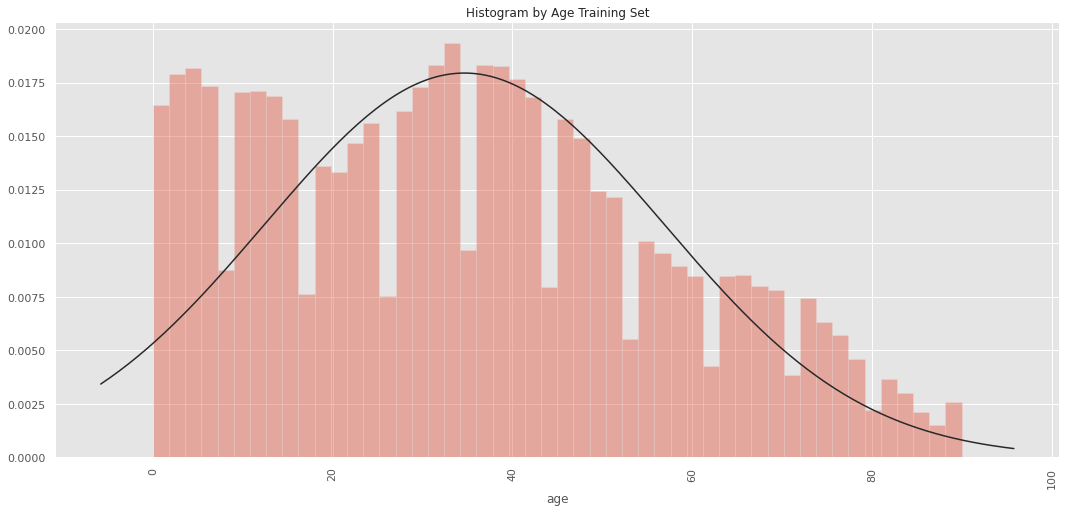

In [22]:
## histogram plot by Age

sns.distplot(X_train_raw['age'],fit=stats.norm, kde=False)
sns.set(color_codes=True)
plt.xticks(rotation=90)
plt.title("Histogram by Age Training Set")

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train_raw, y_train_raw, test_size = 0.25, random_state = 0)
print('Train Dataset length: {0}'.format(len(X_train)))
print('Test Dataset length: {0}'.format(len(X_test)))

Train Dataset length: 150000
Test Dataset length: 50000


In [24]:
# Prepare the data to execute the Model

# Data scaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X_eval = sc_X.fit_transform(X_eval_raw)

In [25]:
### Logistic Regression Model ###
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred_LR  = classifier.predict(X_test)

In [27]:
print('Train Accuracy: {0}'.format(classifier.score(X_train,y_train)))

Train Accuracy: 0.9431466666666667


In [28]:
print(confusion_matrix(y_test,y_pred_LR))
print(classification_report(y_test,y_pred_LR))
print('F1 Score (Logistic Regression Model): {0}'.format(f1_score(y_test,y_pred_LR)))

[[45558   629]
 [ 2333  1480]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46187
           1       0.70      0.39      0.50      3813

    accuracy                           0.94     50000
   macro avg       0.83      0.69      0.73     50000
weighted avg       0.93      0.94      0.93     50000

F1 Score (Logistic Regression Model): 0.4998311381290105


In [29]:
predictions = classifier.predict(X_eval)

In [ ]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ['prediction']
#res = res.reset_index()
res.to_csv("prediction_results_HP.csv")

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
y_pred  = classifier.predict(X_test)

In [32]:
print('Train Accuracy: {0}'.format(classifier.score(X_train,y_train)))

Train Accuracy: 0.99128


In [33]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('F1 Score (Desicion Tree): {0}'.format(f1_score(y_test,y_pred)))

[[44405  1782]
 [ 2065  1748]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     46187
           1       0.50      0.46      0.48      3813

    accuracy                           0.92     50000
   macro avg       0.73      0.71      0.72     50000
weighted avg       0.92      0.92      0.92     50000

F1 Score (Desicion Tree): 0.4760996867765219


In [34]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.136087 using {'learning_rate': 0.3}
-0.685383 (0.000009) with: {'learning_rate': 0.0001}
-0.621814 (0.000084) with: {'learning_rate': 0.001}
-0.311896 (0.000741) with: {'learning_rate': 0.01}
-0.142789 (0.001999) with: {'learning_rate': 0.1}
-0.137820 (0.002075) with: {'learning_rate': 0.2}
-0.136087 (0.002135) with: {'learning_rate': 0.3}


In [ ]:
print('Train Accuracy: {0}'.format(classifier.score(X_train,y_train)))

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('F1 Score (Desicion Tree): {0}'.format(f1_score(y_test,y_pred)))